Epoch 1: NSE = 0.1683
Epoch 2: NSE = 0.1864
Epoch 3: NSE = 0.2205
Epoch 4: NSE = 0.3162
Epoch 5: NSE = 0.2756
Epoch 6: NSE = 0.3859
Epoch 7: NSE = 0.4535
Epoch 8: NSE = 0.4004
Epoch 9: NSE = 0.4766
Epoch 10: NSE = 0.5119
Epoch 11: NSE = 0.5149
Epoch 12: NSE = 0.4981
Epoch 13: NSE = 0.4964
Epoch 14: NSE = 0.5007
Epoch 15: NSE = 0.5297
Epoch 16: NSE = 0.5145
Epoch 17: NSE = 0.5300
Epoch 18: NSE = 0.4980
Epoch 19: NSE = 0.4902
Epoch 20: NSE = 0.5199
Epoch 21: NSE = 0.5208
Epoch 22: NSE = 0.5068
Epoch 23: NSE = 0.5154
Epoch 24: NSE = 0.5221
Epoch 25: NSE = 0.5195
Epoch 26: NSE = 0.5192
Epoch 27: NSE = 0.5021
Epoch 28: NSE = 0.5184
Epoch 29: NSE = 0.5207
Epoch 30: NSE = 0.5183
Epoch 31: NSE = 0.5147
Epoch 32: NSE = 0.5231
Epoch 33: NSE = 0.5164
Epoch 34: NSE = 0.5252
Epoch 35: NSE = 0.5193
Epoch 36: NSE = 0.5216
Epoch 37: NSE = 0.5218
Epoch 38: NSE = 0.5258
Epoch 39: NSE = 0.5245
Epoch 40: NSE = 0.5170
Epoch 41: NSE = 0.5173
Epoch 42: NSE = 0.5177
Epoch 43: NSE = 0.5229
Epoch 44: NSE = 0.51

d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:383: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


NSE: 0.531
MSE: 0.654
RMSE: 0.809
KGE: 0.616
Alpha-NSE: 0.783
Beta-KGE: 1.186
Beta-NSE: 0.142
Pearson-r: 0.743
FHV: -25.297
FMS: -31.955
FLV: 86.287
Peak-Timing: 1.545
Peak-MAPE: 64.876


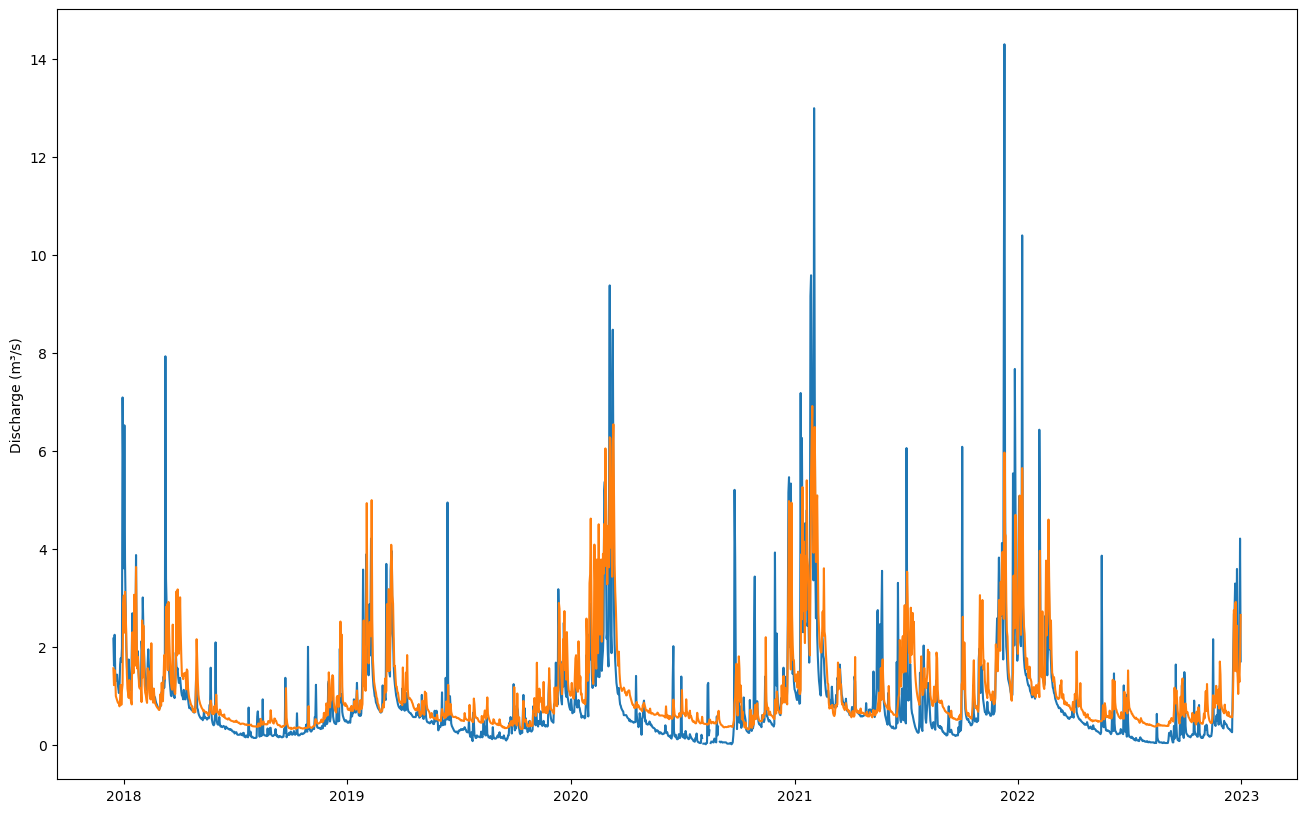

In [1]:

import pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run
import matplotlib.dates as mdates
import os
import numpy as np
area = 111639970.52

# Base directory containing the test results
cwd = Path(os.getcwd())
parent_wd = cwd.parent
run_dir3 = Path(parent_wd / 'runs/Zwalm_2402_181607')
base_dir3 = Path(parent_wd / 'runs/Zwalm_2402_181607/test')


# Initialize variables to track the best NSE and the corresponding epoch
max_nse = -float('inf')  # Set to negative infinity initially
best_epoch = None

# Loop through epochs 1 to 50
for i in range(1, 51):  # Epochs 1 to 50
    # Format the folder name for the current epoch
    epoch_folder = base_dir3 / f"model_epoch{i:03d}"
    metrics_file = epoch_folder / "test_metrics.csv"

    # Check if the test_metrics.csv file exists
    if not metrics_file.exists():
        print(f"test_metrics.csv file not found for epoch {i}. Skipping...")
        continue

    # Load the CSV file into a DataFrame
    df = pd.read_csv(metrics_file)

    # Extract the NSE value from the dataframe (assuming NSE is in a column named 'NSE')
    if 'NSE' in df.columns:
        nse_value = df['NSE'].iloc[0]  
        print(f"Epoch {i}: NSE = {nse_value:.4f}")

        # Check if this is the highest NSE found so far
        if nse_value > max_nse:
            max_nse = nse_value
            best_epoch = i

# Output the best epoch and its NSE value
if best_epoch is not None:
    print(f"\nThe epoch with the highest NSE is Epoch {best_epoch} with an NSE value of {max_nse:.4f}")
else:
    print("No NSE values found.")


with open(run_dir3 / "test" / "model_epoch049" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
qobs = results['6']['1D']['xr']['streamflow_obs']*area/(1000*3600*24)
qsim = results['6']['1D']['xr']['streamflow_sim']*area/(1000*3600*24)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (m³/s)")

    #data properties

values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

In [2]:
qobs = results['6']['1D']['xr']['streamflow_obs'] * area / (1000 * 3600 * 24)
qsim = results['6']['1D']['xr']['streamflow_sim'] * area / (1000 * 3600 * 24)


In [3]:
df = pd.read_csv('qmodm3s_output.csv')
df.set_index('Time', inplace=True)
print(df)

             qmodm3s
Time                
2017-12-15  2.750799
2017-12-16  2.060370
2017-12-17  1.920172
2017-12-18  2.024055
2017-12-19  1.746616
...              ...
2022-12-27  2.154396
2022-12-28  1.921946
2022-12-29  1.956566
2022-12-30  2.321090
2022-12-31  3.256724

[1843 rows x 1 columns]


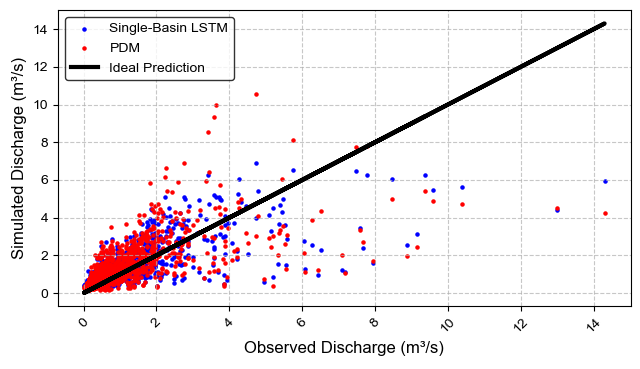

In [4]:
# Create figure with specified size
fig, ax = plt.subplots(figsize=(6.3, 3.5))

# Scatter plot of simulated vs observed discharge
ax.scatter(qobs, qsim, s=5, label='Single-Basin LSTM',color='blue', zorder=1)  # s=10 controls marker size
ax.scatter(qobs, df['qmodm3s'], s=5, label='PDM',color='red', zorder=1) 
# Plot the ideal 1:1 line
ax.plot(qobs, qobs, label='Ideal Prediction', linewidth=3, color='black', zorder=3)

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Rotate x-axis ticks
plt.xticks(rotation=45)

# Add legend
ax.legend(frameon=True, edgecolor='black')

# Axis labels and styling
plt.xlabel('Observed Discharge (m³/s)', fontsize=12)
plt.ylabel('Simulated Discharge (m³/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('seaborn-v0_8-whitegrid')

# Show the plot
plt.show()

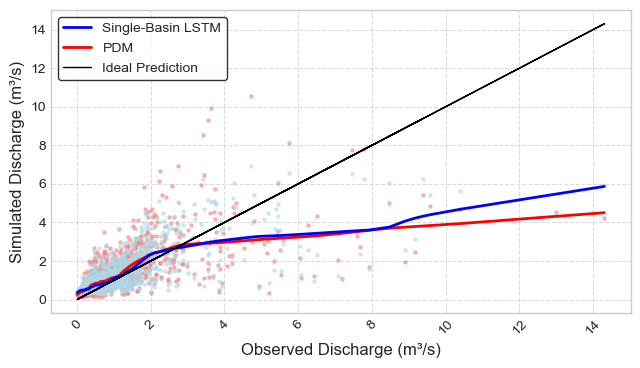

In [6]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

scatter_df = pd.DataFrame({
    'qobs': qobs.values.flatten(),
    'qsim_single': qsim.values.flatten(),
    'qsim_pdm': df['qmodm3s'].values.flatten()
})

# Create figure with specified size
fig, ax = plt.subplots(figsize=(6.3, 3.5))

# Extract variables from DataFrame
x = scatter_df['qobs'].values
y_single = scatter_df['qsim_single'].values
y_pdm = scatter_df['qsim_pdm'].values

# Apply LOWESS smoothing
smoothed_single = lowess(y_single, x, frac=0.1)
smoothed_pdm = lowess(y_pdm, x, frac=0.1)

# Raw scatter plots with low alpha to reduce clutter
ax.scatter(x, y_single, s=5, color='lightblue', alpha=0.5, zorder=2)
ax.scatter(x, y_pdm, s=5, color='lightcoral', alpha=0.5, zorder=1)

# Smoothed trend lines
ax.plot(smoothed_single[:, 0], smoothed_single[:, 1], color='blue', linewidth=2, label='Single-Basin LSTM', zorder=4)
ax.plot(smoothed_pdm[:, 0], smoothed_pdm[:, 1], color='red', linewidth=2, label='PDM', zorder=3)

# Ideal 1:1 line
ax.plot(x, x, label='Ideal Prediction', linewidth=1, color='black', zorder=5)

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)

# Add legend
ax.legend(frameon=True, edgecolor='black')

# Axis labels and styling
plt.xlabel('Observed Discharge (m³/s)', fontsize=12)
plt.ylabel('Simulated Discharge (m³/s)', fontsize=12)
plt.style.use('seaborn-v0_8-whitegrid')
plt.savefig("scattervgl_PDM_Single.png", dpi=1000, bbox_inches='tight') 
# Show the plot
plt.show()


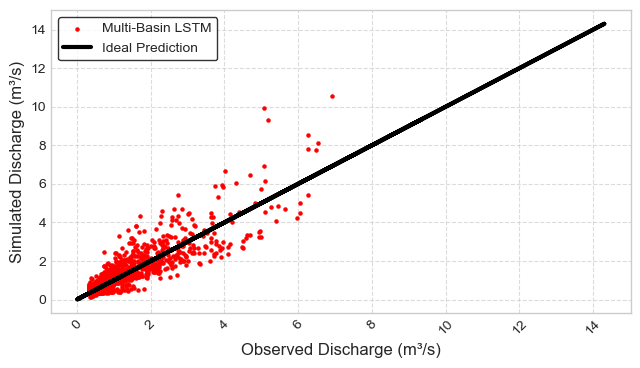

In [58]:
# Create figure with specified size
fig, ax = plt.subplots(figsize=(6.3, 3.5))

# Scatter plot of simulated vs observed discharge

ax.scatter(qsim, df['qmodm3s'], s=5, label='Multi-Basin LSTM',color='red', zorder=1) 
# Plot the ideal 1:1 line
ax.plot(qobs, qobs, label='Ideal Prediction', linewidth=3, color='black', zorder=3)

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Rotate x-axis ticks
plt.xticks(rotation=45)

# Add legend
ax.legend(frameon=True, edgecolor='black')

# Axis labels and styling
plt.xlabel('Observed Discharge (m³/s)', fontsize=12)
plt.ylabel('Simulated Discharge (m³/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('seaborn-v0_8-whitegrid')

# Show the plot
plt.show()

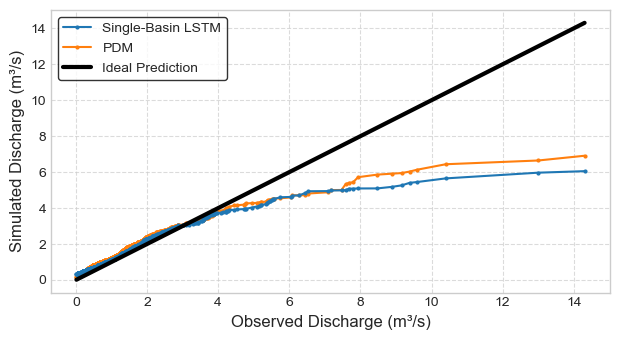

In [59]:
# Flatten the arrays to 1D
qobs_array = qobs.values.flatten()
qsim_array = qsim.values.flatten()

# Sort for QQ plot
qobs_sorted = np.sort(qobs_array)
qsim_sorted = np.sort(qsim_array)
qmod_sorted = np.sort(df['qmodm3s'])
fig, ax = plt.subplots(figsize=(6.3, 3.5))

# QQ Scatter plots
ax.plot(qobs_sorted, qsim_sorted, label='Single-Basin LSTM', zorder=2,markersize=2,marker='o')
ax.plot(qobs_sorted, qmod_sorted, label='PDM', zorder=1,markersize=2,marker='o')

# Ideal 1:1 line
ax.plot(qobs_sorted, qobs_sorted, label='Ideal Prediction', linewidth=3, color='black', zorder=3)

# Axis labels
plt.xlabel('Observed Discharge (m³/s)', fontsize=12)
plt.ylabel('Simulated Discharge (m³/s)', fontsize=12)

# Legend and grid
ax.legend(frameon=True, edgecolor='black')
ax.grid(True, linestyle='--', alpha=0.7)

# Style and layout
plt.style.use('seaborn-v0_8-whitegrid')
plt.tight_layout()

# Show plot
plt.show()